### BAIT 508 HW2: SEC Filings Text Analytics

# DUE DATE: Sunday, Dec 6th, 2020 11:59 p.m.!
# Starter file
This assignment was developed by Jaecheol Park, Myunghwan Lee, and Gene Moo Lee.

- <b>Before taking this assignment, please take a look at the instruction carefully.</b>
- In this assignment, you will use your NLP and Python skills (`pandas`, `BeautifulSoup`, `nltk`, `wordcloud`, user-defined functions, ...) to analyze text data of SEC filings and answer the following questions.
- There are short-answer questions and visualization questions. 
- 20 problems, 5 points each, total 100 points
- For visualization questions, save them separately using the specified file name: `hw2_ans(question_number)_(student_id).png` <br/>
(e.g.) <b>hw2_ans13_37510930.png</b>
- Please <b>don’t</b> submit the `png` file in Canvas. We will run your code to generate this `png` file!
- Submit your Python code in UBC Canvas. DO NOT email your homework to instructors. 
- Again, please submit your code in Canvas. The code file name should be as follows: `hw2_(student_id).py` <br/>
(e.g.) <b>hw2_37510930.py</b>
- If you do not keep the standard submission format, there will be an <b>extra deduction</b> on your grade. 
- If code is not running, you will get <b>minimum</b> grade (Please run by yourself before submitting the assignment).
- Late submissions will not be accepted!

### Import the appropriate libraries you need for this assignment.

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import string
import spacy
import requests
import csv
from bs4 import BeautifulSoup
from collections import Counter
from collections import defaultdict
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud

### Please assign the variables `first_name`, `last_name`, `student_id`, and `email` with your first name, last name, student ID, and email address.

In [2]:
first_name = 'Depeng'
last_name = 'Ye'
student_id = '35205608'
email = 'depengye@student.ubc.ca'

## Download and preprocess the data

- Download `corpus_10k_2015-2019.csv` file into the same directory, where `hw2_starter.ipynb` is located. (If not, there will be an extra deduction on your grade)

- First, create user-defined `isYear` function with two parameters (`target_year`, `text`) which check the `year`column value is the same as `target_year` in the `text`.
- Second, open `corpus_10k_2015-2019.csv` file with `open` function and filter the data which the `year` is `2019` using `isYear` function you defined.
- Save the filtered data as a `txt` file called `corpus.subset.txt`.

[Hint]
- `open` function : https://www.w3schools.com/python/ref_func_open.asp


In [3]:
def isYear(target_year:str, text):
    """
    Check the year column value is the same as target_year in the text.
    """
    return target_year == text

In [4]:
# DicReader learned from
# https://stackoverflow.com/questions/16503560/read-specific-columns-from-a-csv-file-with-csv-module
row_2019 = []
with open('corpus_10k_2015-2019.csv', 'r') as file:
    csv.field_size_limit(1000000)
    reader = csv.DictReader(file)
    for line in reader:
        if isYear('2019', line['year']):
            row_2019.append(line)    

In [5]:
str(list(row_2019[158].values()))[1:-1]

"'1650729-2019', '1650729', 'SiteOne Landscape Supply, Inc.', '0700', '2019', '20190227', '20181230', 'Item    Business The following discussion of our business contains forward looking statements  as discussed in Special Note Regarding Forward Looking Statements and Information above  Our business  operations and financial condition are subject to various risks as set forth in Part I  Item  A   Risk Factors below  The following information should be read in conjunction with the Risk Factors  Managements Discussion and Analysis of Financial Condition and Results of Operations and the Financial Statements and Supplementary Data and related notes included elsewhere in this Annual Report on Form    K  Company Overview We are the largest and only national wholesale distributor of landscape supplies in the United States and have a growing presence in Canada  Our customers are primarily residential and commercial landscape professionals who specialize in the design  installation and maintena

In [6]:
outfile = open('corpus_subset.txt', 'w')
for i in row_2019[0].keys():
    outfile.write(str(i) + '\t')
outfile.write('\n')
for n in range(len(row_2019)):
    for val in row_2019[n].values():
        outfile.write(str(val) + '\t')
    outfile.write('\n')
outfile.close()

- Create dataframe `df` from `corpus.subset.txt` that you made right before, and view the first 5 rows using `head` method.

In [7]:
df = pd.read_csv('corpus_subset.txt', dtype = {'sic': str} , sep = '\t')
df.head()

id      cik                                               name  \
0  1625376-2019  1625376                                  PACMAN MEDIA INC.   
1  1547996-2019  1547996                                 Notis Global, Inc.   
2  1353611-2019  1353611  Invesco CurrencyShares British Pound Sterling ...   
3  1435064-2019  1435064                                        CEMTREX INC   
4   715446-2019   715446                              Anixa Biosciences Inc   

    sic  year  filing_date  fiscal_period  \
0  7373  2019     20190108       20181031   
1  3585  2019     20190108       20161231   
2  6221  2019     20190111       20181031   
3  3829  2019     20190111       20180930   
4  8071  2019     20190111       20181031   

                                              item_1  \
0                                                NaN   
1  ITEM    BUSINESS Overview We are a diversified...   
2                                                NaN   
3  Item    BUSINESS Cemtrex was incorporated in  ...   
4  Item   Business  Overview We were incorporated...   

                                              item_2  \
0  Item   Description of Properties We do not own...   
1  ITEM    PROPERTIES On August          we purch...   
2                                                NaN   
3  ITEM    PROPERTIES The Company has the followi...   
4  Item   Properties  We lease approximately     ...   

                                              item_3  ...  \
0  Item    Legal proceedings  We are not party to...  ...   
1  ITEM    LEGAL PROCEEDINGS Medvend On May      ...  ...   
2                                                NaN  ...   
3  ITEM    LEGAL PROCEEDINGS Three alleged securi...  ...   
4  Item   Legal Proceedings  Other than as descri...  ...   

                                             item_13  \
0  Item     Certain Relationships and Related Tra...   
1  ITEM     CERTAIN RELATIONSHIPS AND RELATED TRA...   
2  Item    Certain Relationships and Related Tran...   
3  ITEM     CERTAIN RELATIONSHIPS AND RELATED TRA...   
4  Item     Certain Relationships and Related Tra...   

                                             item_14  \
0  Item     Principal Accounting Fees and Service...   
1  ITEM     PRINCIPAL ACCOUNTING FEES AND SERVICE...   
2                                                NaN   
3  ITEM     PRINCIPAL ACCOUNTANT FEES AND SERVICE...   
4  Item     Principal Accounting Fees and Service...   

                                             item_1a  \
0  Item  A  Risk Factors  Not applicable to small...   
1  ITEM  A  RISK FACTORS Investing in our common ...   
2                                                NaN   
3  ITEM  A  RISK FACTORS Investing in our common ...   
4  Item  A  Risk Factors  Our business involves a...   

                                             item_1b  \
0  Item  B  Unresolved Staff Comments  We do not ...   
1                                                NaN   
2           Item B  Unresolved Staff Comments None     
3          ITEM  B  UNRESOLVED STAFF COMMENTS None     
4          Item  B Unresolved Staff Comments  None     

                                             item_7a item_7b  \
0  Item  A  Quantitative and Qualitative Disclosu...     NaN   
1  ITEM  A  QUANTITATIVE AND QUALITATIVE DISCLOSU...     NaN   
2                                                NaN     NaN   
3  ITEM  A  QUANTITATIVE AND QUALITATIVE DISCLOSU...     NaN   
4  Item  A  Quantitative and Qualitative Disclosu...     NaN   

                                             item_9a  \
0  Item  A T   Controls and Procedures    DISCLOS...   
1  ITEM  A  CONTROLS AND PROCEDURES  Disclosure c...   
2  Item A  Controls and Procedures Evaluation of ...   
3  ITEM  A  CONTROLS AND PROCEDURES Disclosure Co...   
4  Item  A  Controls and Procedures  Disclosure C...   

                                             item_9b Unnamed: 27 Unnamed: 28  
0  Item  B  Other Information  All other informat...         NaN         NaN 

- Drop <b>the columns</b> where <b>all elements are `NaN`</b> (in other words, this column contains no useful information)
 using `dropna()` method from `pandas`.
 

[Hint]
- `dropna()` method : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [8]:
df = df.dropna(axis = 'columns', how = 'all')
df.head()

id      cik                                               name  \
0  1625376-2019  1625376                                  PACMAN MEDIA INC.   
1  1547996-2019  1547996                                 Notis Global, Inc.   
2  1353611-2019  1353611  Invesco CurrencyShares British Pound Sterling ...   
3  1435064-2019  1435064                                        CEMTREX INC   
4   715446-2019   715446                              Anixa Biosciences Inc   

    sic  year  filing_date  fiscal_period  \
0  7373  2019     20190108       20181031   
1  3585  2019     20190108       20161231   
2  6221  2019     20190111       20181031   
3  3829  2019     20190111       20180930   
4  8071  2019     20190111       20181031   

                                              item_1  \
0                                                NaN   
1  ITEM    BUSINESS Overview We are a diversified...   
2                                                NaN   
3  Item    BUSINESS Cemtrex was incorporated in  ...   
4  Item   Business  Overview We were incorporated...   

                                              item_2  \
0  Item   Description of Properties We do not own...   
1  ITEM    PROPERTIES On August          we purch...   
2                                                NaN   
3  ITEM    PROPERTIES The Company has the followi...   
4  Item   Properties  We lease approximately     ...   

                                              item_3  ...  \
0  Item    Legal proceedings  We are not party to...  ...   
1  ITEM    LEGAL PROCEEDINGS Medvend On May      ...  ...   
2                                                NaN  ...   
3  ITEM    LEGAL PROCEEDINGS Three alleged securi...  ...   
4  Item   Legal Proceedings  Other than as descri...  ...   

                                             item_10  \
0  Item    Directors  Executive Officers  Promote...   
1  ITEM     DIRECTORS  EXECUTIVE OFFICERS AND COR...   
2                                                NaN   
3  ITEM     DIRECTORS  EXECUTIVE OFFICERS AND COR...   
4  Item     Directors  Executive Officers and Cor...   

                                             item_11  \
0   Item     Executive Compensation  Since our in...   
1  ITEM     EXECUTIVE COMPENSATION Summary Compen...   
2  Item    Executive Compensation The Trust has n...   
3  ITEM     EXECUTIVE COMPENSATION We incorporate...   
4  Item     Executive Compensation  The following...   

                                             item_12  \
0  Item     Security Ownership of Certain Benefic...   
1  ITEM     SECURITY OWNERSHIP OF CERTAIN BENEFIC...   
2  Item    Security Ownership of Certain Benefici...   
3  ITEM     SECURITY OWNERSHIP OF CERTAIN BENEFIC...   
4  Item     Security Ownership of Certain Benefic...   

                                             item_13  \
0  Item     Certain Relationships and Related Tra...   
1  ITEM     CERTAIN RELATIONSHIPS AND RELATED TRA...   
2  Item    Certain Relationships and Related Tran...   
3  ITEM     CERTAIN RELATIONSHIPS AND RELATED TRA...   
4  Item     Certain Relationships and Related Tra...   

                                             item_14  \
0  Item     Principal Accounting Fees and Service...   
1  ITEM     PRINCIPAL ACCOUNTING FEES AND SERVICE...   
2                                                NaN   
3  ITEM     PRINCIPAL ACCOUNTANT FEES AND SERVICE...   
4  Item     Principal Accounting Fees and Service...   

                                             item_1a  \
0  Item  A  Risk Factors  Not applicable to small...   
1  ITEM  A  RISK FACTORS Investing in our common ...   
2                                                NaN   
3  ITEM  A  RISK FACTORS Investing in our common ...   
4  Item  A  Risk Factors  Our business involves a...   

                                             item_1b  \
0  Item  B  Unresolved Staff Comments  We do not ...   
1                                                NaN   
2           Item B  Unresolved Staff

- Fill <b>the missing values</b> with <b>empty string ("")</b> using `fillna()` method from `pandas`.
- Then, view the first 5 rows to confirm that missing values have been replaced using `head` method. 

[Hint]
- `fillna()` method : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [9]:
df = df.fillna("")
df.head()

id      cik                                               name  \
0  1625376-2019  1625376                                  PACMAN MEDIA INC.   
1  1547996-2019  1547996                                 Notis Global, Inc.   
2  1353611-2019  1353611  Invesco CurrencyShares British Pound Sterling ...   
3  1435064-2019  1435064                                        CEMTREX INC   
4   715446-2019   715446                              Anixa Biosciences Inc   

    sic  year  filing_date  fiscal_period  \
0  7373  2019     20190108       20181031   
1  3585  2019     20190108       20161231   
2  6221  2019     20190111       20181031   
3  3829  2019     20190111       20180930   
4  8071  2019     20190111       20181031   

                                              item_1  \
0                                                      
1  ITEM    BUSINESS Overview We are a diversified...   
2                                                      
3  Item    BUSINESS Cemtrex was incorporated in  ...   
4  Item   Business  Overview We were incorporated...   

                                              item_2  \
0  Item   Description of Properties We do not own...   
1  ITEM    PROPERTIES On August          we purch...   
2                                                      
3  ITEM    PROPERTIES The Company has the followi...   
4  Item   Properties  We lease approximately     ...   

                                              item_3  ...  \
0  Item    Legal proceedings  We are not party to...  ...   
1  ITEM    LEGAL PROCEEDINGS Medvend On May      ...  ...   
2                                                     ...   
3  ITEM    LEGAL PROCEEDINGS Three alleged securi...  ...   
4  Item   Legal Proceedings  Other than as descri...  ...   

                                             item_10  \
0  Item    Directors  Executive Officers  Promote...   
1  ITEM     DIRECTORS  EXECUTIVE OFFICERS AND COR...   
2                                                      
3  ITEM     DIRECTORS  EXECUTIVE OFFICERS AND COR...   
4  Item     Directors  Executive Officers and Cor...   

                                             item_11  \
0   Item     Executive Compensation  Since our in...   
1  ITEM     EXECUTIVE COMPENSATION Summary Compen...   
2  Item    Executive Compensation The Trust has n...   
3  ITEM     EXECUTIVE COMPENSATION We incorporate...   
4  Item     Executive Compensation  The following...   

                                             item_12  \
0  Item     Security Ownership of Certain Benefic...   
1  ITEM     SECURITY OWNERSHIP OF CERTAIN BENEFIC...   
2  Item    Security Ownership of Certain Benefici...   
3  ITEM     SECURITY OWNERSHIP OF CERTAIN BENEFIC...   
4  Item     Security Ownership of Certain Benefic...   

                                             item_13  \
0  Item     Certain Relationships and Related Tra...   
1  ITEM     CERTAIN RELATIONSHIPS AND RELATED TRA...   
2  Item    Certain Relationships and Related Tran...   
3  ITEM     CERTAIN RELATIONSHIPS AND RELATED TRA...   
4  Item     Certain Relationships and Related Tra...   

                                             item_14  \
0  Item     Principal Accounting Fees and Service...   
1  ITEM     PRINCIPAL ACCOUNTING FEES AND SERVICE...   
2                                                      
3  ITEM     PRINCIPAL ACCOUNTANT FEES AND SERVICE...   
4  Item     Principal Accounting Fees and Service...   

                                             item_1a  \
0  Item  A  Risk Factors  Not applicable to small...   
1  ITEM  A  RISK FACTORS Investing in our common ...   
2                                                      
3  ITEM  A  RISK FACTORS Investing in our common ...   
4  Item  A  Risk Factors  Our business involves a...   

                                             item_1b  \
0  Item  B  Unresolved Staff Comments  We do not ...   
1                                                      
2           Item B  Unresolved Staff

##  Scrape SIC code and names on the web using BeautifulSoup 
- Collect the industry names for sic codes from the <b>"List"</b> section (not "Range") of the Wikipedia page (https://en.wikipedia.org/wiki/Standard_Industrial_Classification).
- Create `code_to_industry_name` dictionary where the `key` is the sic code and the `value` is the industry name.
- Then, replace the SIC code "0100 (01111...)" from the table with 0100.


In [10]:
url = 'https://en.wikipedia.org/wiki/Standard_Industrial_Classification'
r = requests.get(url)

In [11]:
# Creating the soup
html_doc = r.text
wiki_soup = BeautifulSoup(html_doc, 'lxml')

In [12]:
# find the "List" list from teh wiki page. 
tables = wiki_soup.find_all('table', {'class': 'wikitable sortable'})
list_table = tables[1]
list_trs = list_table.find_all('tr')

In [13]:
code_to_industry_name = {}

for tr in list_trs:
    try:
        tds = tr.find_all('td')
        sic_code = tds[0].get_text().strip()
        industry = tds[1].get_text().strip()
        code_to_industry_name[sic_code] = industry
    except:
        continue
code_to_industry_name['0100'] = code_to_industry_name['0100 (01111...)']
del(code_to_industry_name['0100 (01111...)'])
code_to_industry_name

{'0200': 'Agricultural Prod-Livestock & Animal Specialties',
 '0700': 'Agricultural Services',
 '0800': 'Forestry',
 '0900': 'Fishing, Hunting and Trapping',
 '1000': 'Metal Mining',
 '1040': 'Gold and Silver Ores',
 '1090': 'Miscellaneous Metal Ores',
 '1220': 'Bituminous Coal & Lignite Mining',
 '1221': 'Bituminous Coal & Lignite Surface Mining',
 '1311': 'Crude Petroleum & Natural Gas',
 '1381': 'Drilling Oil & Gas Wells',
 '1382': 'Oil & Gas Field Exploration Services',
 '1389': 'Oil & Gas Field Services, NEC',
 '1400': 'Mining & Quarrying of Nonmetallic Minerals (No Fuels)',
 '1520': 'General Bldg Contractors - Residential Bldgs',
 '1531': 'Operative Builders',
 '1540': 'General Bldg Contractors - Nonresidential Bldgs',
 '1600': 'Heavy Construction Other Than Bldg Const - Contractors',
 '1623': 'Water, Sewer, Pipeline, Comm & Power Line Construction',
 '1629': 'Heavy Construction, Not Elsewhere Classified[9]',
 '1700': 'Construction - Special Trade Contractors',
 '1731': 'Electric

- Add a new column `industry_name` to `df` using `lambda` function. (You may use other approaches if needed)
- Values in `industry_name` must correspond to the `sic` in the `df`.
- For example, if a row has a SIC code of `1000`, then value of its industry name will be `Forestry`.

[Hint]
- `lamda` : https://www.w3schools.com/python/python_lambda.asp

In [14]:
to_industry = lambda sic, dic: [dic[str(i)] for i in sic]
df['industry_name'] = to_industry(df['sic'], code_to_industry_name)
df

id      cik  \
0     1625376-2019  1625376   
1     1547996-2019  1547996   
2     1353611-2019  1353611   
3     1435064-2019  1435064   
4      715446-2019   715446   
...            ...      ...   
1176  1314196-2019  1314196   
1177  1423774-2019  1423774   
1178  1710495-2019  1710495   
1179  1676047-2019  1676047   
1180  1671077-2019  1671077   

                                                   name   sic  year  \
0                                     PACMAN MEDIA INC.  7373  2019   
1                                    Notis Global, Inc.  3585  2019   
2     Invesco CurrencyShares British Pound Sterling ...  6221  2019   
3                                           CEMTREX INC  3829  2019   
4                                 Anixa Biosciences Inc  8071  2019   
...                                                 ...   ...   ...   
1176                                    OLB GROUP, INC.  7389  2019   
1177                                          ZUORA INC  7372  2019   
1178                                        MINARO CORP  7372  2019   
1179                                     NutriBand Inc.  3842  2019   
1180                             MED SPA VACATIONS INC.  4700  2019   

      filing_date  fiscal_period  \
0        20190108       20181031   
1        20190108       20161231   
2        20190111       20181031   
3        20190111       20180930   
4        20190111       20181031   
...           ...            ...   
1176     20190418       20181231   
1177     20190418       20190131   
1178     20190418       20190131   
1179     20190419       20190131   
1180     20190422       20181231   

                                                 item_1  \
0                                                         
1     ITEM    BUSINESS Overview We are a diversified...   
2                                                         
3     Item    BUSINESS Cemtrex was incorporated in  ...   
4     Item   Business  Overview We were incorporated...   
...                                                 ...   
1176  Item   Business  Forward Looking Statements Ce...   
1177  Item   Business Overview Zuora is a leading cl...   
1178                                                      
1179  ITEM    BUSINESS Our Business We are primarily...   
1180  ITEM    BUSINESS General We were incorporated ...   

                                                 item_2  \
0     Item   Description of Properties We do not own...   
1     ITEM    PROPERTIES On August          we purch...   
2                                                         
3     ITEM    PROPERTIES The Company has the followi...   
4     Item   Properties  We lease approximately     ...   
...                                                 ...   
1176  Item   Property For our corporate headquarters...   
1177  Item   Properties Our corporate headquarters a...   
1178  Item    Description of Property   We do not ow...   
1179  ITEM    PROPERTIES We do not own any real prop...   
1180  ITEM    PROPERTIES We do not currently own any...   

                                                 item_3  ...  \
0     Item    Legal proceedings  We are not party to...  ...   
1     ITEM    LEGAL PROCEEDINGS Medvend On May      ...  ...   
2                                                        ...   
3     ITEM    LEGAL PROCEEDINGS Three alleged securi...  ...   
4     Item   Legal Proceedings  Other than as descri...  ...   
...                                                 ...  ...   
1176  Item   Legal Proceedings There are no claims  ...  ...   
1177  Item   Legal Proceedings We are not a party to...  ...   
1178  Item    Legal Proceedings There are no pending...  ...   
1179  ITEM    LEGAL PROCEEDINGS On August           ...  ...   
1180  ITEM    LEGAL PROCEEDINGS We know of no materi...  ...   

                                                item_11  \
0      Item     Executive Compensation  Since our in...   
1     ITEM     EXECUTIVE COMPENSATION Summary Compen

## Now, you get the preprocess dataframe `df` to analyze.

## Industry analysis (Q1-Q4)
### Question1. What are the 5 most common industry names? Get them from `industry_name`, not from `sic` code
- Store a list of 5 most common industry names in `ans1`.

In [15]:
# count the column industry_name
ct = dict(Counter(df['industry_name']))
# sort the dictionary
ct_l = sorted(ct, key = ct.get, reverse = True)

In [16]:
ans1 = ct_l[0:5];ans1

['Pharmaceutical Preparations',
 'Blank Checks',
 'Services-Prepackaged Software',
 'Biological Products, (No Diagnostic Substances)',
 'Surgical & Medical Instruments & Apparatus']

### Question2. Out of all the industries with the prefix `Services`, what are the 4 most common industry names?
- Store a list of 4 most common industry names in `ans2`.

In [17]:
ct1 = {} # counter dictionary that starts with Services.
for k in ct.keys():
    if k[0:8] == 'Services':
        ct1[k] = ct[k]
    else:
        continue

In [18]:
ct1_l = sorted(ct1, key = ct1.get, reverse = True)
ans2 = ct1_l[0:4];ans2

['Services-Prepackaged Software',
 'Services-Business Services, NEC',
 'Services-Management Consulting Services',
 'Services-Computer Processing & Data Preparation']

### Question3. What is the `name` of the company `id` with `1353611-2019`?
- Store the company name as a string in `ans3`.

In [19]:
row_q3 = df.loc[df['id'] == '1353611-2019']

In [20]:
ans3 = row_q3[['name']].iloc[0,0]
ans3

'Invesco CurrencyShares British Pound Sterling Trust'

### Question4. What is the `industry_name` of the company with name `Solar Quartz Technologies Corp`?
- Store the industry name as a string in `ans4`.

In [21]:
row_q4 = df.loc[df['name'] == 'Solar Quartz Technologies Corp']

In [22]:
ans4 = row_q4[['industry_name']].iloc[0,0];ans4

'Metal Mining'

## Keyword analysis (Q5 and Q6)

### For Q5 and Q6 you will filter out stopwords and non-alphanumeric English characters. 
- You can use `nltk.corpus.stopwords` for our definition of stopwords. 
- Alphanumeric English characters are letters in the alphabet (`a-z`) and numbers (`0-9`).
- For example, <b>"Python is awesome :scream_cat:"</b> would be filtered to <b>"Python awesome"</b> after removing stopwords (in this case "is") and the emoji (non-alphanumeric).

[Hint]
- `nltk.corpus` for stopwords : https://www.geeksforgeeks.org/removing-stop-words-nltk-python/


In [23]:
stopwords = nltk.corpus.stopwords.words('english')

### Question5. What are the 5 most common words from the `item_5` column?
- Store a list of the 5 most common words in `ans5`.

In [24]:
w = []
# get all words
for item in df['item_5']:
    for word in nltk.word_tokenize(item):
        word = word.lower()
        w.append(word)

In [25]:
count_w = dict(Counter(w))
count_w_l = sorted(count_w, key = count_w.get, reverse = True)

In [26]:
ans5 = count_w_l[0:5];ans5

['the', 'of', 'and', 'to', 'our']

### Question6. What are the 5 most common words from the `Item_5` column without stopwords?
- Store a list of the 5 most common words in `ans6`.

In [27]:
w_ns = []
for word in w:
    if word not in stopwords:
        w_ns.append(word)

In [28]:
count_ns = dict(Counter(w_ns))
count_ns_l = sorted(count_ns, key = count_ns.get, reverse = True)

In [29]:
ans6 = count_ns_l[0:5];ans6

['stock', 'common', 'shares', 'securities', 'equity']

## Named Entity Recognition (Q7-Q9)

- If any of the entities are spaces, exclude them in the analysis.
- For example, `(" ")` is not a valid entity.

In [30]:
nlp = spacy.load('en_core_web_sm', tagger=False, parser=False, matcher=False)

Z:\Anaconda\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.4). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [31]:
df[['item_1']][0:5]

item_1
0                                                   
1  ITEM    BUSINESS Overview We are a diversified...
2                                                   
3  Item    BUSINESS Cemtrex was incorporated in  ...
4  Item   Business  Overview We were incorporated...

### Question7. What are the 5 most common `PERSON` named entities overall from the `item_1` column?
- Store a list of the 5 most common `PERSON` named entities in `ans7`.

In [32]:
# The ' '.join(ent.text.split()) part was learned from stack overflow. Link in below. 
# https://stackoverflow.com/questions/2077897/substitute-multiple-whitespace-with-single-whitespace-in-python

In [33]:
item1_coll = defaultdict(int)
for index, item in df[['item_1']][0:100].iterrows():
    if item[0] != ' ':
        word = nlp(item[0])
        for ent in word.ents:
            if ent.label_ == 'PERSON':
                item1_coll[' '.join(ent.text.split())] += 1
item1_dict = dict(item1_coll)
item1_Plist = sorted(item1_dict, key = item1_dict.get, reverse = True)

In [34]:
ans7 = item1_Plist[0:5];ans7

['Bitcoin', 'Expedia', 'Quell', 'Lumega Z', 'Gbps']

### Question8. What are the 5 most common `ORG` named entities overall from the `item_2` column? 
- Store a list of the 5 most common `ORG` named entities in `ans8`.
- ORG: Companies, agencies, institutions, etc.

In [35]:
item2_coll = defaultdict(int)
for index, item in df[['item_2']][0:100].iterrows():
    if item[0] != ' ':
        word = nlp(item[0])
        for ent in word.ents:
            if ent.label_ == "ORG":
                item2_coll[' '.join(ent.text.split())] += 1
item2_dict = dict(item2_coll)
item2_Plist = sorted(item2_dict, key = item2_dict.get, reverse = True)

In [36]:
ans8 = item2_Plist[0:5]; ans8

['Companys', 'THC', 'Health Canada', 'Sponsor', 'CBD']

### Question9. What are the 4 most common named entities overall from the `item_9` column?
- Store a list of the 4 most common named entities in `ans9`.

In [78]:
item9_coll = defaultdict(int)
for index, item in df[['item_9']][0:100].iterrows():
    if item[0] != ' ':
        word = nlp(item[0])
        for ent in word.ents:
            item9_coll[' '.join(ent.text.split())] += 1
item9_dict = dict(item9_coll)
item9_Plist = sorted(item9_dict, key = item9_dict.get, reverse = True)

In [80]:
ans9 = item9_Plist[0:4]; ans9

['ITEM CHANGES',
 'Companys',
 'Accountants on Accounting and Financial Disclosure',
 'Accountants on Accounting and Financial Disclosure None']

## NER for specific firm (Q10-Q12)
- You want to find the information on the company with id `1653710-2019`.
- Given list comprehension, you want to find out common entities in the dataframe `df`.

In [39]:
columns = [col for col in df.columns if 'item' in col]

In [81]:
columns

['item_1',
 'item_2',
 'item_3',
 'item_4',
 'item_5',
 'item_6',
 'item_7',
 'item_8',
 'item_9',
 'item_10',
 'item_11',
 'item_12',
 'item_13',
 'item_14',
 'item_1a',
 'item_1b',
 'item_7a',
 'item_9a',
 'item_9b']

### Question10. What are the 4 most common `PERSON` named entities mentioned by the company with id `1653710-2019` across all `item_*` rows/columns?
- Store a list of the 4 most common `PERSON` named entities in `ans10`.

In [41]:
dfQ10 = df.loc[df['id'] == '1653710-2019']

In [92]:
itemPer_coll = defaultdict(int)
for colum in columns:
    for index, item in dfQ10[[colum]].iterrows():
        if item[0] != ' ':
            word = nlp(item[0])
            for ent in word.ents:
                if ent.label_ == "PERSON":
                    itemPer_coll[' '.join(ent.text.split())] += 1
itemPer_dict = dict(itemPer_coll)
itemPer_Plist = sorted(itemPer_dict, key = itemPer_dict.get, reverse = True)    

In [94]:
ans10 = itemPer_Plist[0:4]; ans10

['Jeff Bodnar', 'Bo Qian', 'Xiaoya Deng', 'Linda Bao']

### Question11. What are the 2 most common `GPE` named entities mentioned by the company with id `1653710-2019` across all `item_*` rows/columns?
- Store a list of the 2 most common `GPE` named entities in `ans11`.

In [44]:
itemGPE_coll = defaultdict(int)
for colum in columns:
    for index, item in dfQ10[[colum]].iterrows():
        if item[0] != ' ':
            word = nlp(item[0])
            for ent in word.ents:
                if ent.label_ == "GPE":
                    itemGPE_coll[' '.join(ent.text.split())] += 1
itemGPE_dict = dict(itemGPE_coll)
itemGPE_Plist = sorted(itemGPE_dict, key = itemGPE_dict.get, reverse = True)   

In [45]:
ans11 = itemGPE_Plist[0:2]; ans11

['China', 'Washington']

### Question12. What are the 5 most common named entities mentioned by the company with id `1653710-2019` across all `item_*` rows/columns?
- Store a list of the 5 most common named entities in `ans12`.

In [46]:
itemall_coll = defaultdict(int)
for colum in columns:
    for index, item in dfQ10[[colum]].iterrows():
        if item[0] != ' ':
            word = nlp(item[0])
            for ent in word.ents:
                itemall_coll[' '.join(ent.text.split())] += 1
itemall_dict = dict(itemall_coll)
itemall_Plist = sorted(itemall_dict, key = itemall_dict.get, reverse = True)   

In [47]:
ans12 = itemall_Plist[0:5]; ans12

['June', 'ADC', 'March', 'the ADC Agreement', 'Board of Directors']

## Twitter analysis (Q13-Q15)
### `tweets.json` collected  50,000 tweets containing below keywords: 
- Keyword : `analytics`, `technology`, `big data`, `machine learning`, `artificial intelligence`
- The way used to collect the Twitter streaming data is using `tweepy` and `twython` module.
- `tweepy` for Twitter streaming : http://docs.tweepy.org/en/latest/streaming_how_to.html

### Save and read the `tweets.json` file as `tweets` 
- Download `tweets.json` file into the same directory, where `hw2_starter.ipynb` is located. (If not, there will be an extra deduction on your grade)
- Open `tweets.json` file as `tweets` with `open` function.

[Hint]
- `open` function : https://www.w3schools.com/python/ref_func_open.asp

In [48]:
with open('tweets.json', 'r') as jfile:
    jdata = json.load(jfile)

### Question13. In the collected 50,000 tweets, what are the 100 most common words after removing stop words?
- Store a list of the 100 most common words in `ans13`.

In [49]:
import re
# learned this part of filtering non-Alphanumeric characters from:
# https://stackoverflow.com/questions/1276764/stripping-everything-but-alphanumeric-chars-from-a-string-in-python

In [50]:
text_words = []
for tweet in jdata:
    for k, v in tweet.items():
        if k == 'text':
            for word in nltk.word_tokenize(tweet[k]):
                word = word.lower()
                word = re.sub(r'\W+','', word)
                if word not in stopwords and word != '':
                    text_words.append(word)

In [51]:
words_count = dict(Counter(text_words))
word_sort = sorted(words_count, key = words_count.get, reverse = True)

In [52]:
ans13 = word_sort[0:100]; ans13

['rt',
 'https',
 'technology',
 'data',
 'analytics',
 'ai',
 'learning',
 'amp',
 'machine',
 'new',
 'people',
 'artificial',
 'python',
 'voting',
 'intelligence',
 'bigdata',
 'datascience',
 'machinelearning',
 'know',
 'big',
 'iot',
 'facebook',
 'us',
 'real',
 '1',
 'pennsylvania',
 'wrong',
 '2020',
 'gave',
 'tech',
 'voters',
 'extra',
 'counties',
 'mess',
 'rolls',
 'science',
 'judicialwatch',
 'tomfitton',
 'litigation',
 '800k',
 'alleges',
 'iiot',
 'nytimes',
 'china',
 'change',
 'one',
 'like',
 'years',
 'nt',
 '2',
 'via',
 'use',
 'developer',
 'learn',
 'twitter',
 'world',
 'using',
 '2021',
 'rstats',
 '5',
 'computer',
 'gp_pulipaka',
 'things',
 'get',
 'de',
 'look',
 'artificialintelligence',
 'team',
 'create',
 'every',
 'first',
 'mind',
 'good',
 'make',
 'used',
 'images',
 'developed',
 'check',
 'machines',
 'future',
 'recognize',
 'join',
 'work',
 'time',
 'digital',
 'r',
 'free',
 'see',
 'everything',
 'read',
 'help',
 'need',
 'best',
 'ml

### Question14. Find the firm that has the most common words between `item_1` and 50,000 tweets. 
- First, find the 100 most common words of each firm's `item_1` column.
- Then, use the top the top 100 most common words of the 50,000 tweets after removing stop words (`ans13`) to find the most common words between `item_1` and 50,000 tweets. 
- Disregard the word count, we are only interested in the number of unqiue words that appear in intersection of both common words.
- Store the answer as a string in `ans14`.

In [53]:
item1_comm = defaultdict(list)
for i in df[['item_1']][0:100].index:
    w_l = []
    for word in nltk.word_tokenize(df.at[i, 'item_1']):
        word = word.lower()
        word = re.sub(r'\W+','', word)
        if word not in stopwords:
            w_l.append(word)
    w_dc = dict(Counter(w_l))
    w_lsor = sorted(w_dc, key = w_dc.get, reverse = True)
    item1_comm[df['name'][i]] = w_lsor[0:100]

In [54]:
compare_dict = {}
for k, v in item1_comm.items():
    count = 0
    for word in v:
        if word in ans13:
            count += 1
    compare_dict[k] = count
comparesort = sorted(compare_dict.items(), key = lambda item: item[1], reverse = True)

In [55]:
ans14 = comparesort[0][0];ans14

'Snap Inc'

### Question15. In the collected 50,000 tweets, what are the 5 most common named entities mentioned?
- You need to use the NER for this question.
- Store a list of the 5 most common named entities in `ans15`.

In [56]:
ent_NER = []
for tweet in jdata:
    for k, v in tweet.items():
        if k == 'text':
            word = nlp(tweet[k])
            for ent in word.ents:
                ent_NER.append(' '.join(ent.text.split()))

In [57]:
ent_dic = Counter(ent_NER)
ent_sort = sorted(ent_dic, key = ent_dic.get, reverse = True)

In [58]:
ans15 = ent_sort[0:5]; ans15

['#', 'Pennsylvania', 'RT', 'Facebook', 'AI']

## For the following analyses, find the top two most common industries names
- Assign the most common industry name as `top_1` and the second most common industry name as `top_2`.

In [59]:
ind_name = dict(Counter(df['industry_name']))
ind_name_sort = sorted(ind_name, key = ind_name.get, reverse = True)
top_1 = ind_name_sort[0]
top_2 = ind_name_sort[1]
dftop_1 = df.loc[df['industry_name'] == top_1]
dftop_2 = df.loc[df['industry_name'] == top_2]

In [60]:
top_2

'Blank Checks'

## Word cloud and sentiment analysis (Q16-Q19)

- Use `wordcloud` library and `WordCloud` function in it.
- Define user-defined `generate_wordcloud` function with one parameter `values` to generate word cloud for one input value.
- You don't need `axis` in the wordcloud and use `bilinear` interpolation. 

[Hint]
- `bilinear` for `imshow()` : https://matplotlib.org/3.3.1/gallery/images_contours_and_fields/interpolation_methods.html

In [61]:
def generate_wordcloud(value:str):
    """
    generates the wordcloud plot for the input. 
    """
    wordcloud1 = WordCloud(width = 600, height = 300).generate(value)
    plt.figure(figsize=(20,10)) # set up figure size
    plt.imshow(wordcloud1, interpolation = 'bilinear') 

### Question16. Make two separate wordclouds for `item_1` column.
- One for the most common industry and another one for the second most common industry.
- Save the graph named "`hw2_ans16a_(student_id).png`" and "`hw2_ans16b_(student_id).png`".<br/>
  (e.g.) <b>hw2_ans16a_37510930.png</b>, <b>hw2_ans16b_37510930.png</b>, respectively.

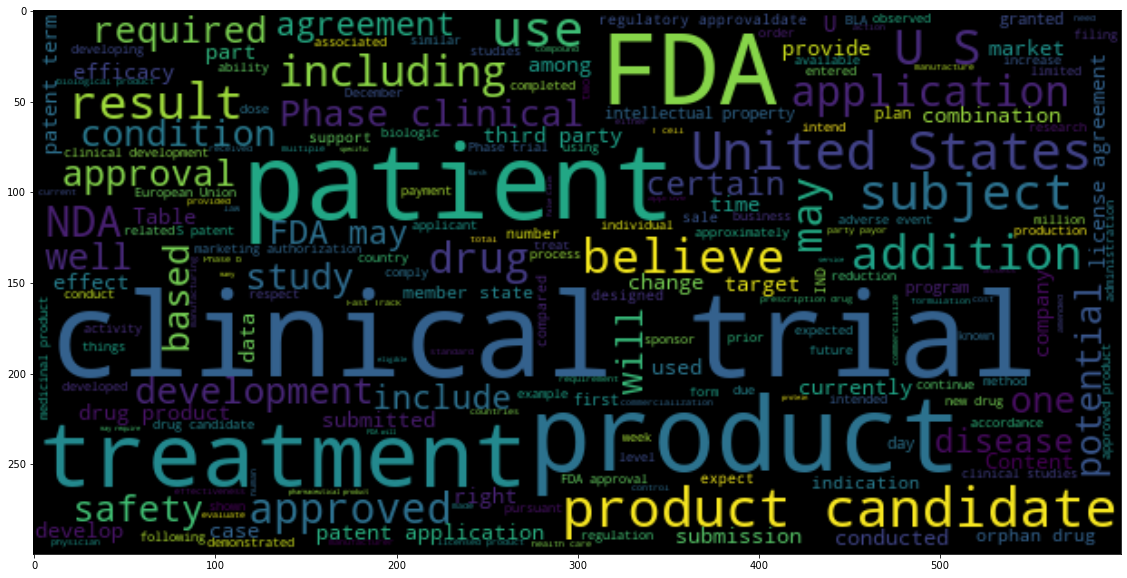

In [62]:
text_1 = ''
for i in dftop_1.index:
    text_1 += dftop_1.at[i, 'item_1']
generate_wordcloud(text_1)
plt.savefig('hw2_ans16a_35205608.png')

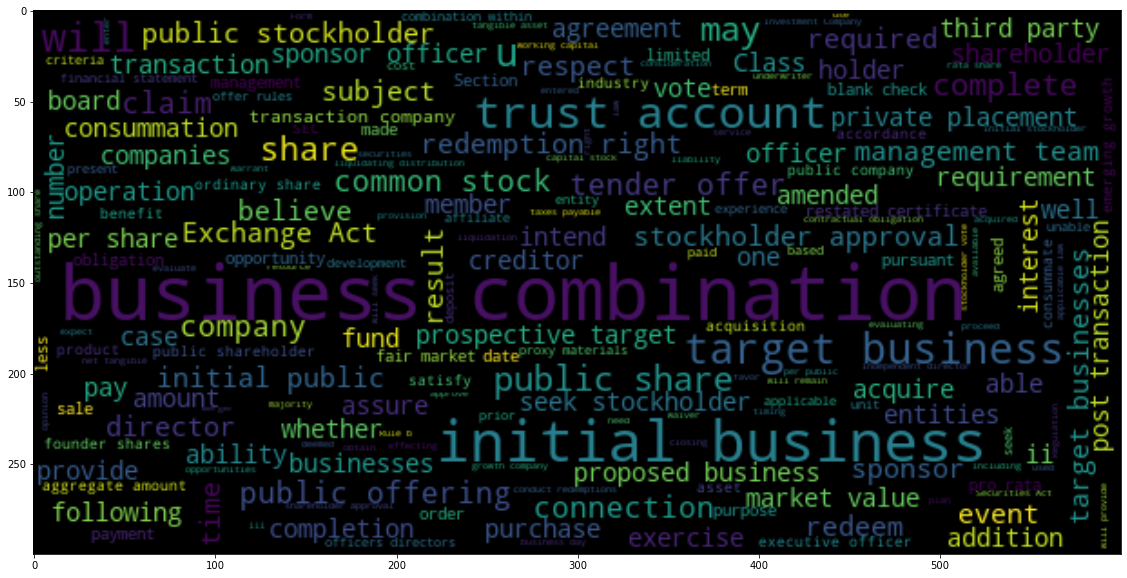

In [63]:
text_2 = ''
for i in dftop_2.index:
    text_2 += dftop_2.at[i, 'item_1']
generate_wordcloud(text_2)
plt.savefig('hw2_ans16b_35205608.png')

### Question17. Make two separate wordclouds for `item_1a`column.
- One for the most common industry and another one for the second most common industry.
- Save the graph named "`hw2_ans17a_(student_id).png`" and "`hw2_ans17b_(student_id).png`".<br/>
  (e.g.) <b>hw2_ans17a_37510930.png</b>, <b>hw2_ans17b_37510930.png</b>, respectively.

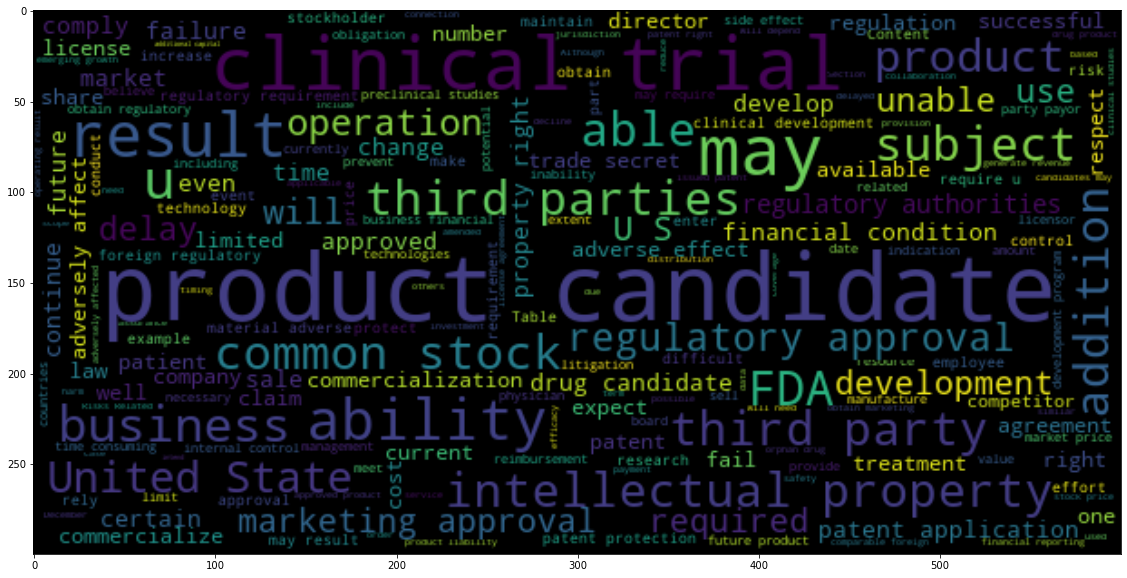

In [64]:
text_17a = ''
for i in dftop_1.index:
    text_17a += dftop_1.at[i, 'item_1a']
generate_wordcloud(text_17a)
plt.savefig('hw2_ans17a_35205608.png')

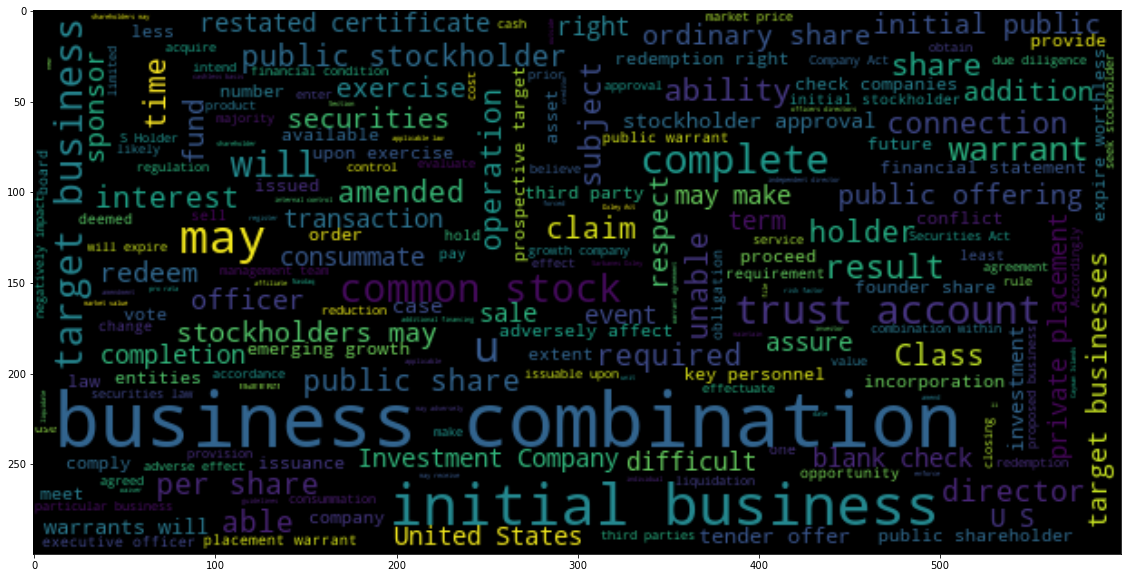

In [65]:
text_17b = ''
for i in dftop_2.index:
    text_17b += dftop_2.at[i, 'item_1a']
generate_wordcloud(text_17b)
plt.savefig('hw2_ans17b_35205608.png')

### Question18. Make two separate wordclouds for `item_7` column
- One for the most common industry and another one for the second most common industry.
- Save the graph named "`hw2_ans18a_(student_id).png`" and "`hw2_ans18b_(student_id).png`".<br/>
  (e.g.) <b>hw2_ans18a_37510930.png</b>, <b>hw2_ans18b_37510930.png</b>, respectively.

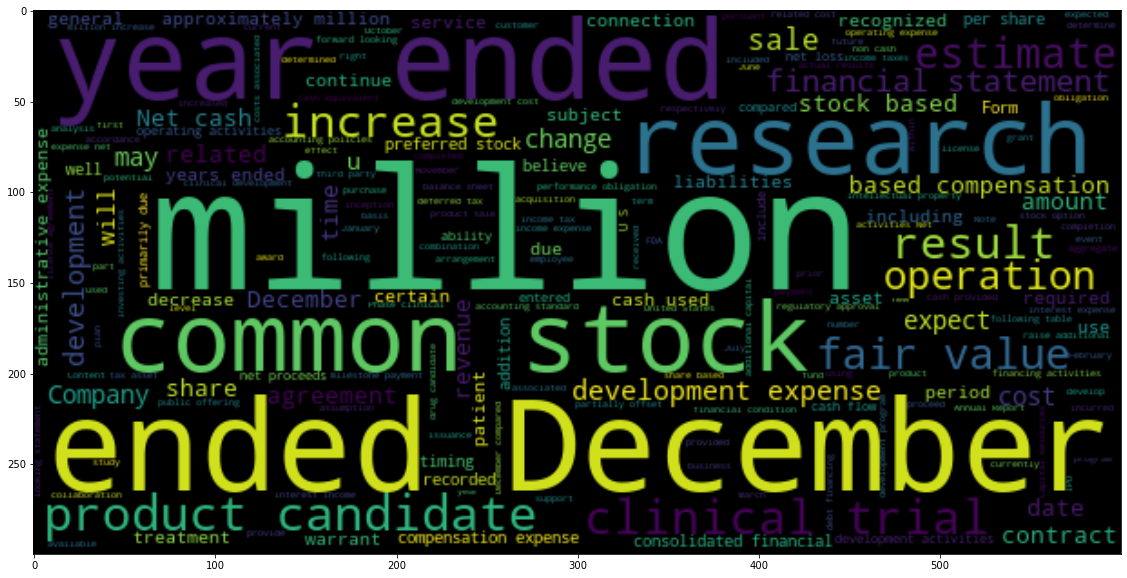

In [66]:
text_18a = ''
for i in dftop_1.index:
    text_18a += dftop_1.at[i, 'item_7']
generate_wordcloud(text_18a)
plt.savefig('hw2_ans18a_35205608.png')

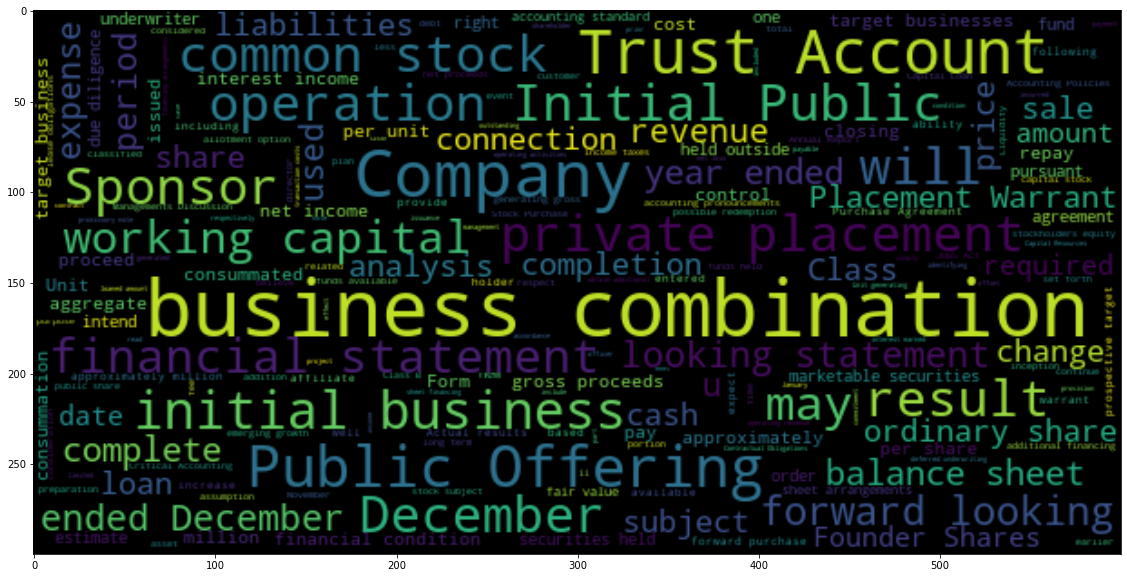

In [67]:
text_18b = ''
for i in dftop_2.index:
    text_18b += dftop_2.at[i, 'item_7']
generate_wordcloud(text_18b)
plt.savefig('hw2_ans18b_35205608.png')

### Question19. Make two histograms of the polarity for `item_1a` column. 
- One for the most common industry and another one for the second most common industry.
- Save the graph named "`hw2_ans19a_(student_id).png`" and "`hw2_ans19b_(student_id).png`".<br/>
  (e.g.) <b>hw2_ans19a_37510930.png</b>, <b>hw2_ans19b_37510930.png</b>, respectively.

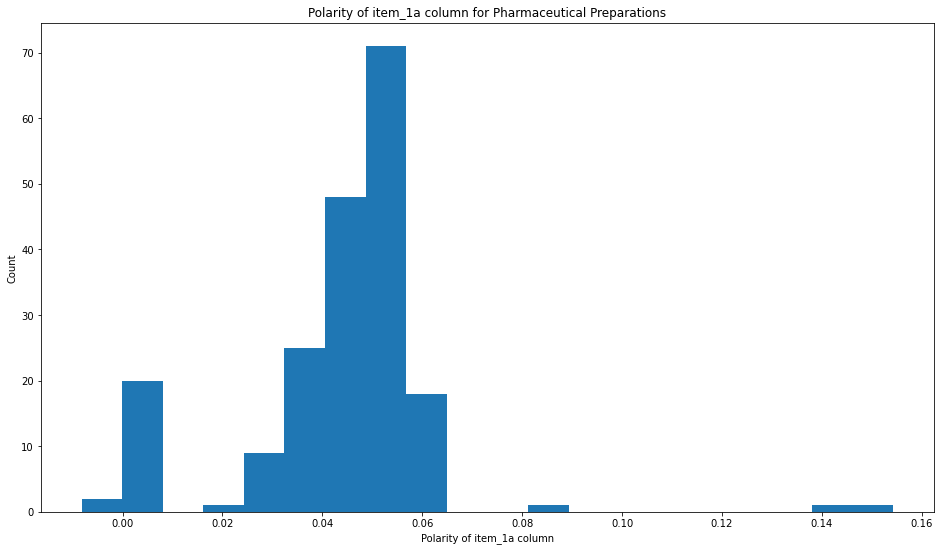

In [68]:
pola_1 = []
for i in dftop_1.index:
    sent = dftop_1.at[i, 'item_1a']
    tb = TextBlob(sent)
    pola_1.append(tb.sentiment.polarity)
plt.figure(figsize=(16,9))
plt.hist(pola_1, bins = 20)
plt.xlabel('Polarity of item_1a column')
plt.ylabel('Count')
plt.title('Polarity of item_1a column for Pharmaceutical Preparations')
plt.savefig('hw2_ans19a_35205608.png')

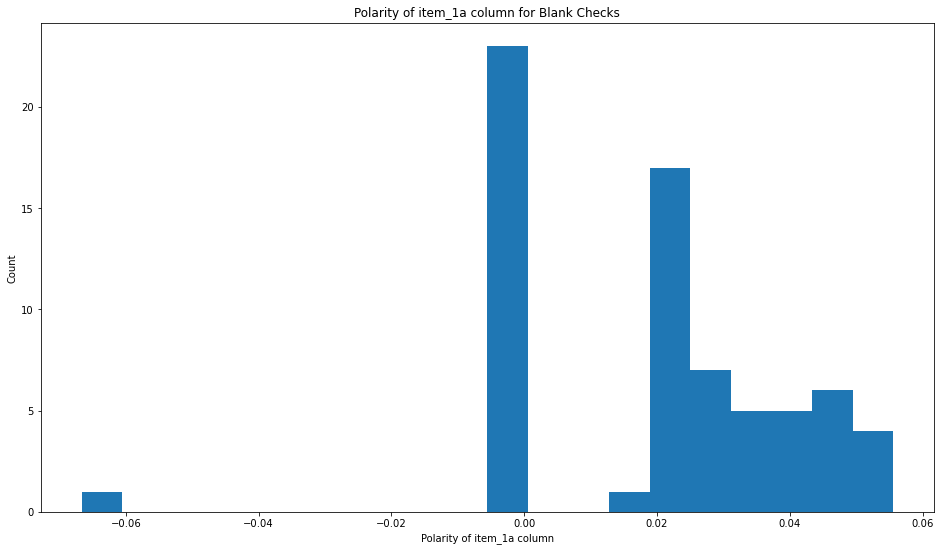

In [69]:
pola_2 = []
for i in dftop_2.index:
    sent = dftop_2.at[i, 'item_1a']
    tb = TextBlob(sent)
    pola_2.append(tb.sentiment.polarity)
plt.figure(figsize=(16,9))
plt.hist(pola_2, bins = 20)
plt.xlabel('Polarity of item_1a column')
plt.ylabel('Count')
plt.title('Polarity of item_1a column for Blank Checks')
plt.savefig('hw2_ans19b_35205608.png')

### Question 20: Make outfile name format as `hw2_answers_(student_id).txt` and save it to `txt` file                
- When you write the answer, please keep format(please refer to word doc example).
- File name should be like this : <b>hw2_answers_37510930.txt</b>

In [70]:
outfile = open('hw2_answers_35205608.txt', 'w')
outfile.write( last_name + ', ' + first_name + ', ' + email + '\n')
for i in range(1, 20):
    try:
        v = locals()['ans' + str(i)]
        outfile.write('ans' + str(i) + '=' + str(v)  + '\n')
    except:
        continue
outfile.write('HW 2 is done!!!')
outfile.close()

#### After finishing `hw2`, please submit this python code file on Canvas!!
#### But, you don't need to submit the `.png` files. 

#### Again, the code file name should be as follows: `hw2_(student_id).py` 
(e.g.) hw2_37510930.py